## Importing Libraries

In [50]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import skimage.color

## Downloading Image

In [51]:
#download image
!wget -O image.jpg https://raw.githubusercontent.com/ozgunsungar/highlight_color/main/rose.jpg
!wget -O image2.jpg https://raw.githubusercontent.com/ozgunsungar/highlight_color/main/rose2.jpg

--2022-04-23 12:42:34--  https://raw.githubusercontent.com/ozgunsungar/highlight_color/main/rose.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60590 (59K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  59.17K  --.-KB/s    in 0.01s   

2022-04-23 12:42:34 (4.30 MB/s) - ‘image.jpg’ saved [60590/60590]

--2022-04-23 12:42:34--  https://raw.githubusercontent.com/ozgunsungar/highlight_color/main/rose2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99260 (97K) [image/jpeg]
Saving to: ‘ima

## Image Preprocessing

In [52]:
def pre_processing(img):
  # open an image using opencv
  
  # get image height and width
  height, width, channels = img.shape

  scale_percent = 60  # percent of original size
  width = int(width * scale_percent / 100)
  height = int(height * scale_percent / 100)
  dim = (width, height)
  img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
  cv2_imshow(img)
  return img

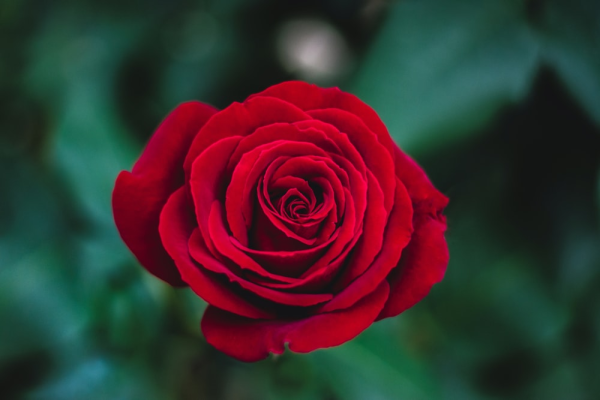

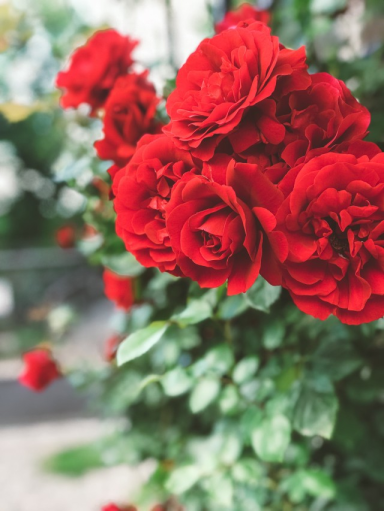

In [53]:
image = cv2.imread('image.jpg')
image2 = cv2.imread('image2.jpg')
image = pre_processing(image)
image2 = pre_processing(image2)

## HSV Color Model Processing

In [54]:
def hsv_process(img):

  #convert the BGR image to HSV colour space
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  #obtain the grayscale image of the original image
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  # set the bounds for the red hue
  #np.array([h.min , s.min ,v.min]) for lower_red

  # lower mask (0-15)
  lower_red = np.array([0,10,50])
  upper_red = np.array([15,255,255])
  mask0 = cv2.inRange(hsv, lower_red, upper_red)

  # upper mask (165-180)
  lower_red = np.array([165,50,50])
  upper_red = np.array([180,255,255])
  mask1 = cv2.inRange(hsv, lower_red, upper_red)

  # join my masks
  # mask = mask0+mask1

  # create a mask using the bounds set
  mask = cv2.inRange(hsv, lower_red, upper_red)
  # create an inverse of the mask
  mask_inv = cv2.bitwise_not(mask)
  # Filter only the red colour from the original image using the mask(foreground)
  res = cv2.bitwise_and(img, img, mask=mask)
  # Filter the regions containing colours other than red from the grayscale image(background)
  background = cv2.bitwise_and(gray, gray, mask = mask_inv)

  # convert the one channelled grayscale background to a three channelled image
  background = np.stack((background,)*3, axis=-1)
  # add the foreground and the background
  img_highlighted = cv2.add(res, background)

  cv2_imshow(img_highlighted)

  # # save image using opencv
  # cv2.imwrite('highlighted_image.jpg', img_highlighted)

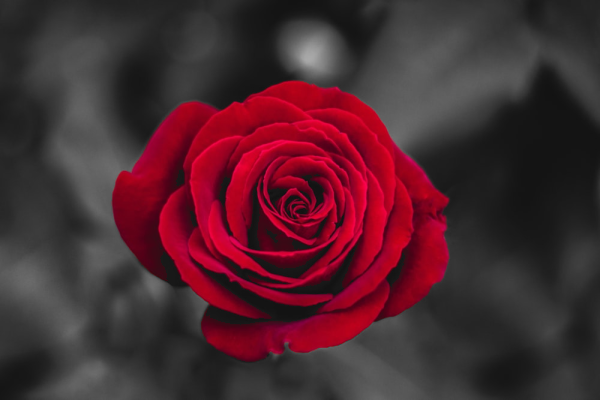

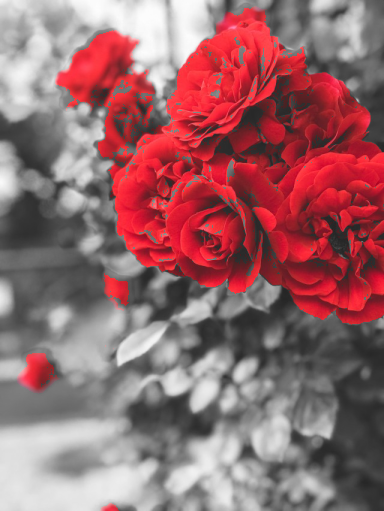

In [55]:
hsv_process(image)
#second image includes white pixels on rose surface, that's why there are gray blanks at image
hsv_process(image2)

## YIQ Color Model Processing

In [56]:
def yiq_process(img):
  B,G,R = cv2.split(img)

  # histogram equalization for true color images
  # B = cv2.equalizeHist(B)
  # G = cv2.equalizeHist(G)
  # R = cv2.equalizeHist(R)

  Y = 0.299*R+0.587*G+0.114*B
  I = 0.596*R-0.274*G-0.322*B
  Q = 0.211*R-0.523*G+0.312*B

  Y = np.uint8(Y)

  Y = cv2.equalizeHist(Y)

  Y = Y.astype(np.float64)


  R = 1.0*Y+0.956*I+0.621*Q
  G = 1.0*Y-0.272*I-0.647*Q
  B = 1.0*Y-1.106*I+1.703*Q


  histogram_yiq = np.dstack((B,G,R))


  #normalize the image
  # It's statistically approach but not reliable for image processing. We shouldn't use it
  # mx = np.amax(histogram_yiq)
  # mn = np.amin(histogram_yiq)
  # histogram_yiq = (histogram_yiq - mn) / (mx - mn) * 255

  histogram_yiq[histogram_yiq<0] = 0 #negative pixels assigned to 0

  cv2_imshow(histogram_yiq)

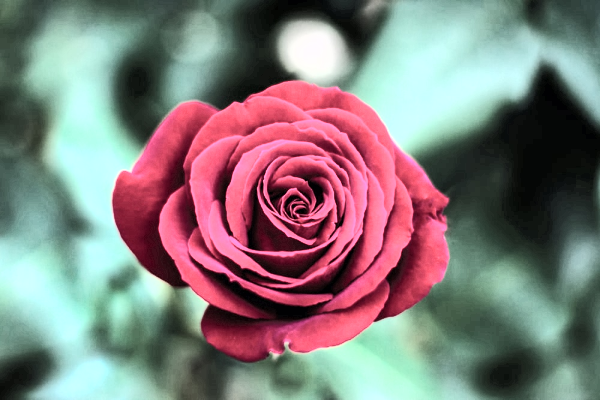

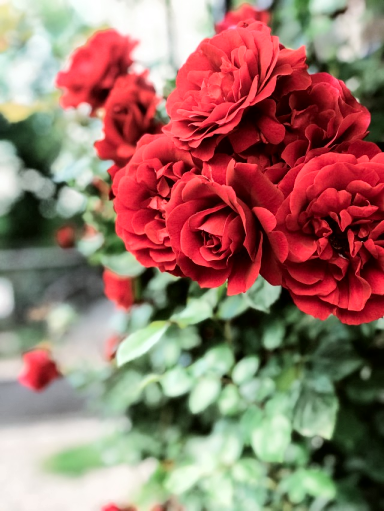

In [57]:
yiq_process(image)
yiq_process(image2)
